In [15]:
import numpy as np
import torch

In [16]:
dir_path = '/home/sci/nawazish.khan/non-linear-ssm-experiments/supershapes/pytorch-model-NewRun-0-realnvp-non_zero_mean_anisotropic-FullSS/'

In [23]:
cov =  torch.from_numpy(np.load(f'{dir_path}/cov.npy')).float()
eigvalsH =  torch.from_numpy(np.load(f'{dir_path}/eigvalsh.npy')).float()
eigvalsP =  torch.from_numpy(np.load(f'{dir_path}/eigvals.npy')).float()

In [24]:
print(f'{eigvalsP.shape} {eigvalsH.shape}')

torch.Size([3072]) torch.Size([3072])


In [30]:
modes_retained = 0.95

In [68]:
eigvalsH_ = eigvalsH.flip(0)
eigvals = eigvalsH_
q = torch.cumsum(eigvals, dim=0)/eigvals.sum(0)

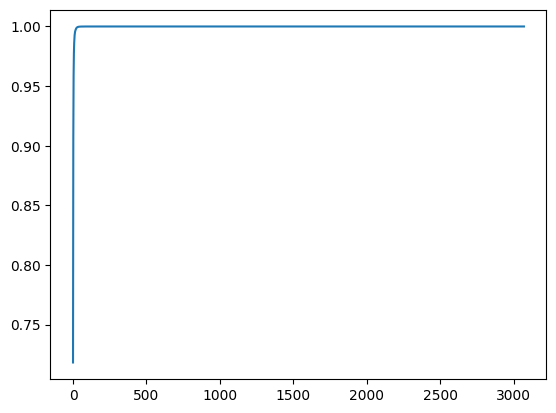

In [69]:
import matplotlib.pyplot as plt

plt.plot(np.arange(q.shape[0]), q.numpy())
plt.show()

In [70]:
indices_retained  = ((torch.cumsum(eigvals, dim=0)/eigvals.sum(0)) > modes_retained).float()
indices_retained.sum(0)

tensor(3068.)

In [71]:
indices_excluded = ((torch.cumsum(eigvals, dim=0)/eigvals.sum(0)) <= modes_retained).float()
indices_excluded.sum(0)

tensor(4.)

In [72]:
remaining_var = ((indices_excluded * eigvals).sum())/indices_excluded.sum()
remaining_var

tensor(6190.6460)

In [73]:
eigvals

tensor([ 1.8948e+04,  3.8629e+03,  1.0948e+03,  ..., -3.0748e-04,
        -4.3423e-04, -1.7342e-03])

In [74]:
eigvals_in = indices_retained * eigvals
eigvals_in

tensor([ 0.0000,  0.0000,  0.0000,  ..., -0.0003, -0.0004, -0.0017])

In [75]:
eigvals_out = indices_excluded * remaining_var
eigvals_out

tensor([6190.6460, 6190.6460, 6190.6460,  ...,    0.0000,    0.0000,
           0.0000])

In [76]:
eigvals_all = eigvals_in + eigvals_out
eigvals_all[0:10]

tensor([6190.6460, 6190.6460, 6190.6460, 6190.6460,  539.1937,  298.9643,
         183.7202,  139.6708,   93.0917,   73.1766])

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def plot_correspondences(z, z_sampled):
    plt.clf()
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax1 = fig.add_subplot(1, 3, 1, projection='3d')
    ax1.set_title(r'Particles')
    # ax1.scatter3D(z[:, 0], z[: , 1], z[:, 2], color='red', label='Shape Sample')
    ax1.scatter3D(z_sampled[:, 0], z_sampled[: , 1], z_sampled[:, 2], color='blue', label='Augmented Sample')
    plt.legend()
    plt.show()

In [11]:
dir_path = '/home/sci/nawazish.khan/non-linear-ssm-experiments/supershapes/pytorch-model-NewRun-Deep-1-Aug-realnvp-non_zero_mean_anisotropic-FullSS/'
shape_matrix = np.load(f'{dir_path}/shape_matrix_data.npy')
augmented_data = np.load(f'{dir_path}/augmented_data.npy')
N, M, d = shape_matrix.shape

<Figure size 640x480 with 0 Axes>

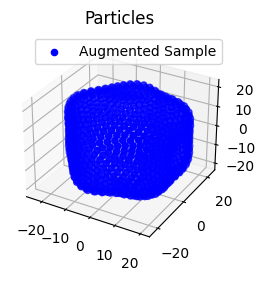

In [12]:
plot_correspondences(shape_matrix[0, ...], augmented_data[0, ...])

In [13]:
shape_matrix[0, ...][0:10]

array([[ -9.84982,   7.12888, -17.8265 ],
       [ 18.0161 ,  -6.76194,  14.7409 ],
       [ 12.0325 ,  17.576  , -11.4972 ],
       [  2.75236, -19.8885 , -12.1717 ],
       [-20.547  ,  -5.91035,   4.09897],
       [ -8.77303,   9.94266,  17.737  ],
       [-13.2639 ,  13.2969 , -14.4943 ],
       [ -5.18034, -22.6549 ,   1.13806],
       [ -8.53365,  21.7183 ,   3.30551],
       [ 19.9826 , -10.116  ,  -7.90694]])

In [15]:
augmented_data[0, ...][0:10]

array([[ -9.83232545,   7.12601927, -17.83134565],
       [ 17.98956681,  -6.76202285,  14.73770369],
       [ 12.02713371,  17.57915403, -11.49298949],
       [  2.74170397, -19.8973624 , -12.17645733],
       [-20.54010318,  -5.90473808,   4.08591451],
       [ -8.78422475,   9.95002837,  17.75274634],
       [-13.26421075,  13.29006553, -14.4833437 ],
       [ -5.18343577, -22.64764248,   1.15355072],
       [ -8.5273492 ,  21.71903493,   3.31283271],
       [ 19.97617425, -10.11778093,  -7.91267955]])

In [23]:
import torch
import torch.autograd as autograd

In [40]:
def compute_square(x):
    return x, x*x

In [41]:
def exp_reducer(x):
  _, out =  compute_square(x)
  print(f'{out.shape}')
  return out 


In [42]:
dM = 1024

In [57]:
inputs = torch.rand(1024).to('cuda:0')
inputs_ = torch.tensor(inputs, requires_grad=True)
inputs_

/tmp/ipykernel_14269/546093914.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs_ = torch.tensor(inputs, requires_grad=True)


tensor([0.8442, 0.4515, 0.2784,  ..., 0.4897, 0.7295, 0.1061], device='cuda:0',
       requires_grad=True)

In [58]:
inputs_ = inputs.clone().detach().requires_grad_(True)
inputs_

tensor([0.8442, 0.4515, 0.2784,  ..., 0.4897, 0.7295, 0.1061], device='cuda:0',
       requires_grad=True)

In [61]:
inputsx = inputs[0:10].requires_grad_(True)
inputsx

tensor([0.8442, 0.4515, 0.2784, 0.5964, 0.9129, 0.8136, 0.4973, 0.7223, 0.8684,
        0.5647], device='cuda:0', requires_grad=True)

In [51]:
res = autograd.functional.jacobian(exp_reducer, inputs)
res.shape

torch.Size([1024])


torch.Size([1024, 1024])

In [2]:
dir_path = '/home/sci/nawazish.khan/non-linear-ssm-experiments/supershapes/pytorch-model-NewRun-Deep-2-Aug-realnvp-non_zero_mean_anisotropic-FullSS-1/'
import numpy as np

In [3]:
jac = np.load(f'{dir_path}/jacobian.npy')
jac_ = np.load(f'{dir_path}/jacobian_.npy')
u = np.load(f'{dir_path}/u_tensor.npy')
log_det = np.load(f'{dir_path}/log_det.npy')



In [4]:
np.allclose(u[1], u[2989])

True

In [7]:
np.allclose(jac, jac_, 1e-4, 1e-4)

False

In [9]:
np.sum(jac)

3403.0085

In [21]:
np.sum(log_det[0])

-659.38306

In [23]:
np.log(-659)

/tmp/ipykernel_30410/45004673.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-659)


nan

In [20]:
np.log(-100)

/tmp/ipykernel_30410/60392587.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-100)


nan

In [16]:
np.det

array([ 2.947154, 15.211361], dtype=float32)

In [80]:
jac[10:13, 0:3]

array([[-0.00049104,  0.00081996, -0.00013195],
       [-0.01083869,  0.00333334, -0.00066359],
       [-0.0018117 ,  0.00118708, -0.00028355]], dtype=float32)

In [81]:
jac_[10:13, 0:3]

array([[-0.00049104,  0.00081996, -0.00013195],
       [-0.01083869,  0.00333334, -0.00066359],
       [-0.0018117 ,  0.00118708, -0.00028355]], dtype=float32)

In [24]:
import torch

In [29]:
x = torch.rand(5, 10)
x.sum(1).shape


torch.Size([5])

In [93]:
x.reshape(10)

tensor([0.0787, 0.4883, 0.4897, 0.6676, 0.7108, 0.0353, 0.0760, 0.4253, 0.2165,
        0.4553])